In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.simplefilter('ignore')

In [2]:
data = pd.read_csv(r"C:\Users\MRK\Downloads\drugss.csv")

In [3]:
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,70731,Abacavir / dolutegravir / lamivudine,HIV Infection,"""Thought I would be the first to post as I was...",10,11-Dec-14,76
1,94806,Abilify,Autism,"""My stepson is now 13 years old and has been o...",10,7-Feb-14,141
2,94980,Abilify,Autism,"""My 10 year old son, was on Risperdal and it w...",8,27-Aug-11,105
3,94955,Abilify,Autism,"""Abilify works wonders, but it can have long t...",10,9-Dec-09,103
4,94764,Abilify,Autism,"""After much deliberation and many, many meetin...",5,18-Nov-13,103


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11332 entries, 0 to 11331
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   uniqueID     11332 non-null  int64 
 1   drugName     11332 non-null  object
 2   condition    11332 non-null  object
 3   review       11332 non-null  object
 4   rating       11332 non-null  int64 
 5   date         11332 non-null  object
 6   usefulCount  11332 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 619.8+ KB


In [5]:
for col in data.columns:
    print("Col name : ", col, "unique percentage : ", len(data[col].unique())/len(data))

Col name :  uniqueID unique percentage :  1.0
Col name :  drugName unique percentage :  0.10095305330038828
Col name :  condition unique percentage :  0.03679844687610307
Col name :  review unique percentage :  0.7034062830921285
Col name :  rating unique percentage :  0.0008824567596187787
Col name :  date unique percentage :  0.2627073773385104
Col name :  usefulCount unique percentage :  0.020472996823155665


In [6]:
data.isnull().sum()

uniqueID       0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11332 entries, 0 to 11331
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   uniqueID     11332 non-null  int64 
 1   drugName     11332 non-null  object
 2   condition    11332 non-null  object
 3   review       11332 non-null  object
 4   rating       11332 non-null  int64 
 5   date         11332 non-null  object
 6   usefulCount  11332 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 619.8+ KB


In [8]:
data.shape

(11332, 7)

In [9]:
rating_to_sentiment = {
    1: "negative",
    2: "negative",
    3: "negative",
    4: "negative",
    5: "neutral",
    6: "neutral",
    7: "neutral",
    8: "positive",
    9: "positive",
    10: "positive"
}

# Assign sentiment labels based on ratings
data['sentiment'] = data['rating'].map(rating_to_sentiment)

In [10]:
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,sentiment
0,70731,Abacavir / dolutegravir / lamivudine,HIV Infection,"""Thought I would be the first to post as I was...",10,11-Dec-14,76,positive
1,94806,Abilify,Autism,"""My stepson is now 13 years old and has been o...",10,7-Feb-14,141,positive
2,94980,Abilify,Autism,"""My 10 year old son, was on Risperdal and it w...",8,27-Aug-11,105,positive
3,94955,Abilify,Autism,"""Abilify works wonders, but it can have long t...",10,9-Dec-09,103,positive
4,94764,Abilify,Autism,"""After much deliberation and many, many meetin...",5,18-Nov-13,103,neutral


In [11]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform the "sentiment" labels
data['sentiment_encoded'] = label_encoder.fit_transform(data['sentiment'])

# Print the mapping of original "sentiment" labels to encoded values
label_mapping = dict(zip(data['sentiment'], data['sentiment_encoded']))
print(label_mapping)

{'positive': 2, 'neutral': 1, 'negative': 0}


In [12]:
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,sentiment,sentiment_encoded
0,70731,Abacavir / dolutegravir / lamivudine,HIV Infection,"""Thought I would be the first to post as I was...",10,11-Dec-14,76,positive,2
1,94806,Abilify,Autism,"""My stepson is now 13 years old and has been o...",10,7-Feb-14,141,positive,2
2,94980,Abilify,Autism,"""My 10 year old son, was on Risperdal and it w...",8,27-Aug-11,105,positive,2
3,94955,Abilify,Autism,"""Abilify works wonders, but it can have long t...",10,9-Dec-09,103,positive,2
4,94764,Abilify,Autism,"""After much deliberation and many, many meetin...",5,18-Nov-13,103,neutral,1


In [13]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and labels (Y)
X = data['review']
Y = data['sentiment_encoded']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

# The 'test_size' parameter specifies the proportion of the data to be used for testing (e.g., 0.2 for 20%).
# The 'random_state' parameter ensures reproducibility by providing a fixed seed for the random split.

# Print the shapes of the training and testing sets to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)


X_train shape: (5666,)
X_test shape: (5666,)
Y_train shape: (5666,)
Y_test shape: (5666,)


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11332 entries, 0 to 11331
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   uniqueID           11332 non-null  int64 
 1   drugName           11332 non-null  object
 2   condition          11332 non-null  object
 3   review             11332 non-null  object
 4   rating             11332 non-null  int64 
 5   date               11332 non-null  object
 6   usefulCount        11332 non-null  int64 
 7   sentiment          11332 non-null  object
 8   sentiment_encoded  11332 non-null  int32 
dtypes: int32(1), int64(3), object(5)
memory usage: 752.6+ KB


In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Sample dataset
reviews = data['review']  # Assuming data is your DataFrame with the 'review' column

# Create a Tokenizer instance
tokenizer = Tokenizer()

# Fit the tokenizer on the reviews
tokenizer.fit_on_texts(reviews)

# Get the word index mapping
word_index = tokenizer.word_index

# Tokenize the review text data
sequences = tokenizer.texts_to_sequences(reviews)

# Print the word index mapping
print("Word Index Mapping:")
print(word_index)

# Print the tokenized sequences for the first few reviews
print("Tokenized Sequences:")
for i in range(5):  # Print the tokenized sequences for the first 5 reviews as an example
    print(sequences[i])


Word Index Mapping:
{'i': 1, 'and': 2, 'the': 3, 'to': 4, 'a': 5, 'it': 6, 'my': 7, 'for': 8, '039': 9, 'of': 10, 'have': 11, 'was': 12, 'in': 13, 'on': 14, 'this': 15, 'me': 16, 'with': 17, 'is': 18, 'had': 19, 'but': 20, 'that': 21, 'been': 22, 'not': 23, 't': 24, 'so': 25, 'at': 26, 'years': 27, 'side': 28, 'after': 29, 'am': 30, 'no': 31, 'day': 32, 'as': 33, 'has': 34, 'taking': 35, 'effects': 36, 'now': 37, 'pain': 38, 'take': 39, 'about': 40, 'all': 41, 'up': 42, 'sleep': 43, 'you': 44, 'only': 45, 'from': 46, '2': 47, 'be': 48, 'm': 49, 's': 50, 'very': 51, 'started': 52, 'or': 53, 'can': 54, 'time': 55, 'months': 56, 'like': 57, 'life': 58, 'when': 59, '3': 60, 'get': 61, 'first': 62, 've': 63, 'medication': 64, 'doctor': 65, 'days': 66, 'just': 67, 'back': 68, 'feel': 69, 'if': 70, 'medicine': 71, 'night': 72, 'out': 73, 'more': 74, 'are': 75, 'would': 76, 'one': 77, 'an': 78, 'weeks': 79, 'will': 80, 'also': 81, 'which': 82, 'do': 83, 'took': 84, 'since': 85, 'did': 86, 'the

In [16]:
print(len(word_index))

15304


In [17]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenized sequences from the "review" column
sequences = tokenizer.texts_to_sequences(data['review'])  # Assuming you already have tokenized sequences

# Define a maximum sequence length (e.g., 100)
max_sequence_length = 100

# Pad the sequences to the maximum length
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post', truncating='post')

# Print the first padded sequence as an example
print("Padded Sequence (Example):")
print(padded_sequences[0])


Padded Sequence (Example):
[ 305    1   76   48    3   62    4  752   33    1   12  631  251    8
  526   91  318   15   71 1353    1  430   46 3096    4 8145   29   47
   27   10  169   14 3096    1   12  123  101  196  156    2   12   81
  917   40  184  629  463    2  730 5642    1    9   63   22   14 8145
    8   47  131    9   50   37    2    6    9   50   22  119 1240 1530
   18   96 1438    2  196   18  180    1  959  325   15   71   25  194
    2   76  234    6    8  373  703   10 1736    3   45  610   28  160
    1    9]


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11332 entries, 0 to 11331
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   uniqueID           11332 non-null  int64 
 1   drugName           11332 non-null  object
 2   condition          11332 non-null  object
 3   review             11332 non-null  object
 4   rating             11332 non-null  int64 
 5   date               11332 non-null  object
 6   usefulCount        11332 non-null  int64 
 7   sentiment          11332 non-null  object
 8   sentiment_encoded  11332 non-null  int32 
dtypes: int32(1), int64(3), object(5)
memory usage: 752.6+ KB


In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

In [20]:
# Sample dataset with features 'padded_sequences' and 'sentiment_encoded'
# 'padded_sequences' should be the tokenized and padded review sequences
X = padded_sequences  # Assuming you have your padded sequences
Y = data['sentiment_encoded']

In [21]:
from tensorflow.keras.models import load_model

# Load the RNN-LSTM model
rnn_lstm_model = load_model("RNN_lstm.h5")

# Load the RNN-simple model
rnn_simple_model = load_model("RNN_Seq.h5")


In [29]:
# Assume your model is loaded as rnn_lstm_model and rnn_simple_model

user_review = input("Enter the drug review: ")

# Create a DataFrame with the new data
new_data = pd.DataFrame({
    'review': [user_review]
    # You might need to add other columns based on your original data structure
})

# Preprocess the new data
new_padded_sequences = tokenizer.texts_to_sequences(new_data['review'])
X_new = pad_sequences(new_padded_sequences, maxlen=100, padding='post')

# Make predictions
prediction_rnn_lstm = rnn_lstm_model.predict(X_new)
prediction_rnn_simple = rnn_simple_model.predict(X_new)

# Convert predictions to sentiment labels
sentiment_labels = {0: "Negative", 1: "Neutral", 2: "Positive"}
sentiment_rnn_lstm = sentiment_labels[np.argmax(prediction_rnn_lstm)]
sentiment_rnn_simple = sentiment_labels[np.argmax(prediction_rnn_simple)]

# Print the results
print("Prediction using RNN LSTM model:", sentiment_rnn_lstm)
print("Prediction using Simple RNN model:", sentiment_rnn_simple)


Enter the drug review:  Not good. Could be better.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction using RNN LSTM model: Negative
Prediction using Simple RNN model: Positive


In [23]:
print(data['sentiment_encoded'])

0        2
1        2
2        2
3        2
4        1
        ..
11327    2
11328    2
11329    2
11330    2
11331    2
Name: sentiment_encoded, Length: 11332, dtype: int32


355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


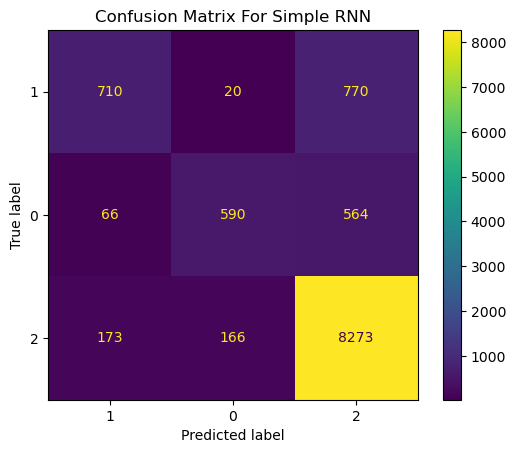

In [24]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Assuming you have the true sentiment labels in 'actual' and predicted labels in 'predicted'
actual = data['sentiment_encoded'].values

predicted_sentiments = rnn_simple_model.predict(X)

# Convert predicted sentiments to class labels
predicted_simple = [np.argmax(pred) for pred in predicted_sentiments]

# Make sure 'actual' and 'predicted' are numpy arrays

# Calculate the confusion matrix
confusion_matrix = metrics.confusion_matrix(actual, predicted_simple)

# Define class labels based on the sentiment_encoded values in your dataset
class_labels = {
    1: "Positive",
    0: "Negative",
    2: "Neutral"
}
# Replace with your actual sentiment classes

# Plot the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=class_labels)

# Plot the confusion matrix
cm_display.plot()
plt.title('Confusion Matrix For Simple RNN')
plt.show()


355/355 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


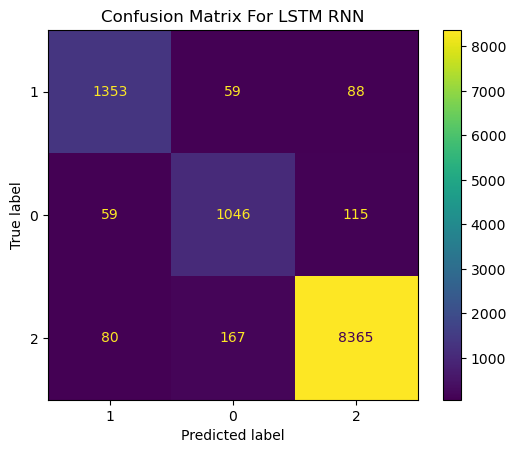

In [25]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Assuming you have the true sentiment labels in 'actual' and predicted labels in 'predicted'
actual = data['sentiment_encoded'].values

predicted_sentiments = rnn_lstm_model.predict(X)

# Convert predicted sentiments to class labels
predicted_lstm = [np.argmax(pred) for pred in predicted_sentiments]

# Make sure 'actual' and 'predicted' are numpy arrays

# Calculate the confusion matrix
confusion_matrix = metrics.confusion_matrix(actual, predicted_lstm)

# Define class labels based on the sentiment_encoded values in your dataset
class_labels = {
    1: "Positive",
    0: "Negative",
    2: "Neutral"
}
# Replace with your actual sentiment classes

# Plot the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=class_labels)

# Plot the confusion matrix
cm_display.plot()
plt.title('Confusion Matrix For LSTM RNN')
plt.show()

In [26]:
print('For simple:')
print(classification_report(actual, predicted_simple))

For simple:
              precision    recall  f1-score   support

           0       0.75      0.47      0.58      1500
           1       0.76      0.48      0.59      1220
           2       0.86      0.96      0.91      8612

    accuracy                           0.84     11332
   macro avg       0.79      0.64      0.69     11332
weighted avg       0.84      0.84      0.83     11332



In [27]:
print('For LSTM:')
print(classification_report(actual, predicted_lstm))

For LSTM:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1500
           1       0.82      0.86      0.84      1220
           2       0.98      0.97      0.97      8612

    accuracy                           0.95     11332
   macro avg       0.90      0.91      0.91     11332
weighted avg       0.95      0.95      0.95     11332

